In [1]:
# YES/NO data dictionary

YES = 1
NO = 2
NOT_APPLY = 97
IGNORED = 98
NOT_SPECIFIED = 99


# Laboratory result dictionary
LAB_POSITIVE  = 1
LAB_NO_POSITIVE = 2
LAB_PENDING_RESULT = 3
LAB_WRONG_RESULT = 4
LAB_NOT_APPLY = 97 # CASO SIN MUESTRA


In [2]:
import json
from os import environ
from os.path import join

input_folder = environ.get('CROSSCOMPUTE_INPUT_FOLDER', 'tests/standard/input')
output_folder = environ.get('CROSSCOMPUTE_OUTPUT_FOLDER', 'tests/standard/output')
# settings_path = join(input_folder, 'settings.json')
# d = json.load(open(settings_path, 'rt'))
# d

In [3]:
import tempfile

data_dir = tempfile.TemporaryDirectory()
data_dir.name

'/tmp/tmphihljomp'

In [4]:
import requests
import tempfile

temp_file = tempfile.NamedTemporaryFile(mode='wb', delete=False)
chunk_size=128

covid_data_url = 'http://datosabiertos.salud.gob.mx/gobmx/salud/datos_abiertos/datos_abiertos_covid19.zip'
covid_zip_data = temp_file.name
covid_zip_file = temp_file.file

response = requests.get(covid_data_url, stream=True)

for chunk in response.iter_content(chunk_size=chunk_size):
    temp_file.write(chunk)

temp_file.close()

covid_zip_data


'/tmp/tmpet1vc171'

In [5]:
from zipfile import ZipFile
import os

data_dir.cleanup()
covid_csv_data = ''


# with ZipFile(covid_zip_data, 'r') as zip:
#     zip.extractall(data_dir.name)
    
# for root, dirs, files in os.walk(data_dir.name):
#     if dirs == [] and files != []:
#         covid_csv_data = os.path.join(root, files[0])
#         print(covid_csv_data)

In [6]:
import pandas as pd

covid_pd = pd.read_csv(covid_zip_data, compression='zip', header=0, )
covid_pd.set_index('ID_REGISTRO')

# covid_pd.groupby('RESULTADO_LAB').size()


,FECHA_ACTUALIZACION,ORIGEN,SECTOR,ENTIDAD_UM,SEXO,ENTIDAD_NAC,ENTIDAD_RES,MUNICIPIO_RES,TIPO_PACIENTE,FECHA_INGRESO,...,OTRO_CASO,TOMA_MUESTRA_LAB,RESULTADO_LAB,TOMA_MUESTRA_ANTIGENO,RESULTADO_ANTIGENO,CLASIFICACION_FINAL,MIGRANTE,PAIS_NACIONALIDAD,PAIS_ORIGEN,UCI
ID_REGISTRO,,,,,,,,,,,,,,,,,,,,,
z482b8,2021-05-06,1,12,9,2,9,9,12,1,2020-10-16,...,2,2,97,2,97,1,99,México,97,97
z49a69,2021-05-06,1,12,23,1,23,23,4,2,2020-07-20,...,1,2,97,2,97,2,99,México,97,1
z23d9d,2021-05-06,1,12,22,2,24,22,9,1,2021-01-05,...,2,2,97,2,97,6,99,México,97,97
z24953,2021-05-06,1,12,9,1,9,9,10,1,2020-10-15,...,1,1,2,2,97,7,99,México,97,97
zz8e77,2021-05-06,1,12,9,2,9,9,2,1,2020-04-16,...,2,2,97,2,97,6,99,México,97,97
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9f2664,2021-05-06,2,4,9,1,9,9,3,1,2021-04-30,...,1,2,97,1,1,3,99,México,97,97
79560e,2021-05-06,2,12,17,1,17,17,29,1,2021-04-27,...,1,2,97,1,2,7,99,México,97,97
bb7733,2021-05-06,2,4,15,1,9,15,39,1,2021-04-30,...,2,2,97,1,1,3,99,México,97,97


# Impacto del COVID19 por estado y por indicadores de la OCDE

<ipython-input-16-3d9662374f44>:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mx_status['gmi_admin'] = list(updated_column)


,admin_name,positive_cov_19,deaths_cov_19,population
gmi_admin,,,,
AGS,Aguascalientes,0.017064,0.001680,1184996.0
BCN,Baja California,0.012590,0.002317,3155070.0
BCS,Baja California Sur,0.042045,0.001851,637026.0
CMP,Campeche,0.010390,0.001357,822441.0
CHP,Chiapas,0.012998,0.001195,4796580.0
CHH,Chihuahua,0.002652,0.000294,3406465.0
CDZ,Coahuila,0.003184,0.000490,2748391.0
COL,Colima,0.064125,0.008019,650555.0
DTD,Distrito Federal,0.031313,0.002613,9209944.0


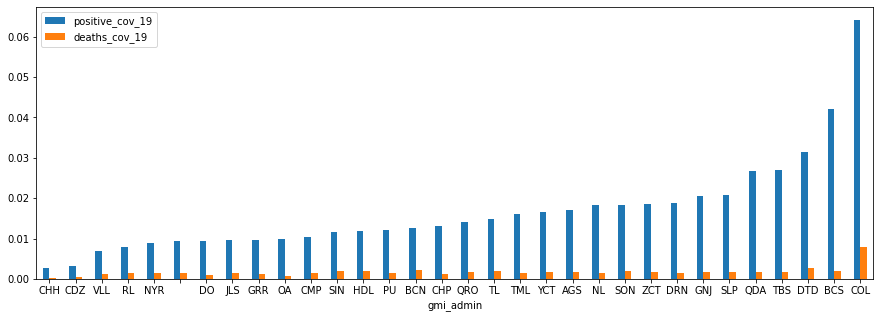

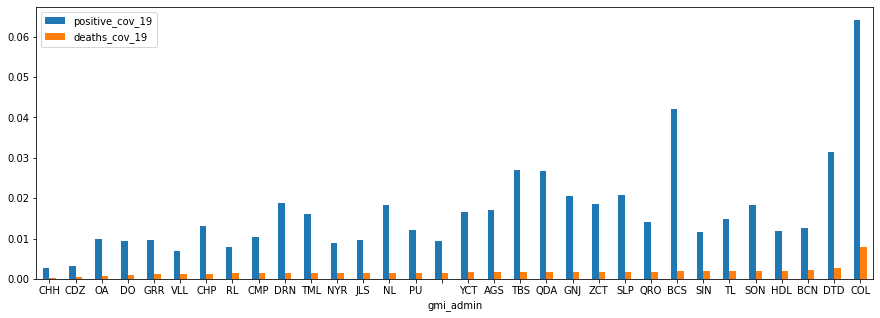

In [16]:
# Casos y Mortalidad por estado
import matplotlib.pyplot as plt
import geopandas

mx = geopandas.read_file('data/mexican_states.geojson')
mx = mx.set_index('fips_admin')
mx = mx.sort_values(by=['fips_admin'])

cases_cv19 = []
deaths_cv19 = []

def who_died(df):
    return df[df['FECHA_DEF'] != '9999-99-99']

cv19_confirmed_cases  = covid_pd[covid_pd['RESULTADO_LAB'] == YES]

covid_by_states_dfs = cv19_confirmed_cases.groupby('ENTIDAD_RES')
for index in range(1, 33):
    df = covid_by_states_dfs.get_group(index)
    cases_cv19.append(df.shape[0])
    deaths_cv19.append(who_died(df).shape[0])

normalized_mx = mx.copy()
mx['positive_cov_19'] = cases_cv19
mx['deaths_cov_19'] = deaths_cv19
mx['population'] = 0

mx.to_csv(join(output_folder, 'table2.csv'), columns=['admin_name', 'positive_cov_19', 'deaths_cov_19'])
mx_status = mx[['admin_name', 'positive_cov_19', 'deaths_cov_19', 'gmi_admin']]


updated_column = map(lambda x: x.strip('MEX-'), list(mx_status['gmi_admin']))
mx_status['gmi_admin'] = list(updated_column)
mx_status = mx_status.set_index('gmi_admin')
mx_status.loc['AGS', 'population'] = 1184996
mx_status.loc['BCN', 'population'] = 3155070
mx_status.loc['BCS', 'population'] = 637026
mx_status.loc['CMP', 'population'] = 822441
mx_status.loc['CHP', 'population'] = 4796580
mx_status.loc['CHH', 'population'] = 3406465
mx_status.loc['CDZ', 'population'] = 2748391
mx_status.loc['COL', 'population'] = 650555
mx_status.loc['DTD', 'population'] = 9209944
mx_status.loc['DRN', 'population'] = 1632934
mx_status.loc['GNJ', 'population'] = 5486372
mx_status.loc['GRR', 'population'] = 3388768
mx_status.loc['HDL', 'population'] = 2665018
mx_status.loc['JLS', 'population'] = 7350682
mx_status.loc['', 'population'] = 16992418
mx_status.loc['DO', 'population'] = 4351037
mx_status.loc['RL', 'population'] = 1777227
mx_status.loc['NYR', 'population'] = 1084979
mx_status.loc['NL', 'population'] = 5784442
mx_status.loc['OA', 'population'] = 3801962
mx_status.loc['PU', 'population'] = 5779829
mx_status.loc['QDA', 'population'] = 1827937
mx_status.loc['QRO', 'population'] = 1325578
mx_status.loc['SLP', 'population'] = 2585518
mx_status.loc['SIN', 'population'] = 2767761
mx_status.loc['SON', 'population'] = 2662480
mx_status.loc['TBS', 'population'] = 2238603
mx_status.loc['TML', 'population'] = 3268554
mx_status.loc['TL', 'population'] = 1169936
mx_status.loc['VLL', 'population'] = 7643194
mx_status.loc['YCT', 'population'] = 1955577
mx_status.loc['ZCT', 'population'] = 1490668

normalized_data = mx_status.copy()
normalized_data['positive_cov_19'] = mx_status.apply(lambda x: x['positive_cov_19'] / x['population'], axis=1)
normalized_data['deaths_cov_19'] = mx_status.apply(lambda x: x['deaths_cov_19'] / x['population'], axis=1)

normalized_mx['positive_cov_19'] = list(normalized_data['positive_cov_19'])
normalized_mx['deaths_cov_19'] = list(normalized_data['deaths_cov_19'])

ax = normalized_data.drop(['population'], axis=1).sort_values(by=['positive_cov_19']).plot.bar(rot=0, figsize=(15,5))
plt.savefig(join(output_folder, 'figure1.png'))
ax = normalized_data.drop(['population'], axis=1).sort_values(by=['deaths_cov_19']).plot.bar(rot=0, figsize=(15,5))
plt.savefig(join(output_folder, 'figure2.png'))


normalized_data.to_csv(join(output_folder, 'table1.csv'))
normalized_data
# Orden por Acceso a servicios de salud OCDE
# Orden por Grado de pobreza OCDE

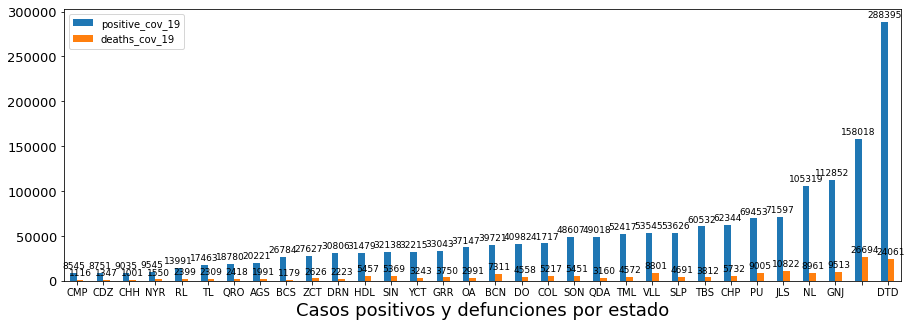

In [17]:
ax = mx_status.drop(['population'], axis=1).sort_values(by=['positive_cov_19']).plot.bar(rot=0, figsize=(15,5))

plt.yticks(fontsize = 13)
plt.xlabel('Casos positivos y defunciones por estado', fontsize = 18)



# add value label to each bar, displayng its height
for p in ax.patches:
    ax.annotate(p.get_height(),
                         (p.get_x() + p.get_width()/2., p.get_height()),
                        ha = 'center', va = 'center', xytext = (0,7), textcoords = 'offset points', size=9)

# save Figure 3 as an image
plt.savefig(join(output_folder, 'figure3.png'))

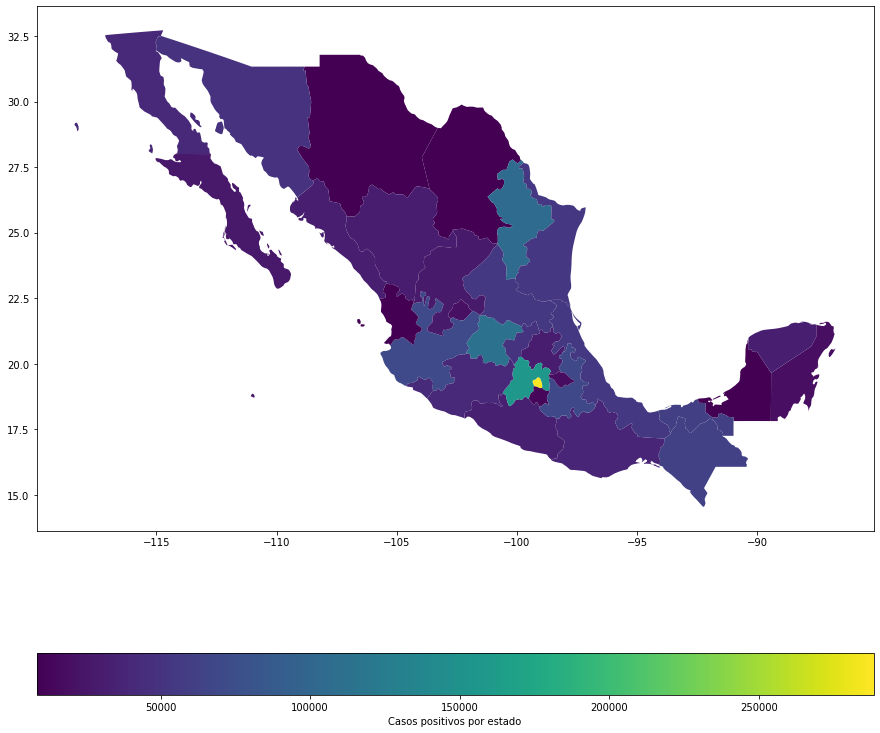

In [18]:
fig, ax = plt.subplots(1, 1, figsize=(15, 15))

mx.plot(column='positive_cov_19', ax=ax, legend=True,
               legend_kwds={'label': "Casos positivos por estado",
                            'orientation': "horizontal"})

plt.savefig(join(output_folder, 'figure4.png'))

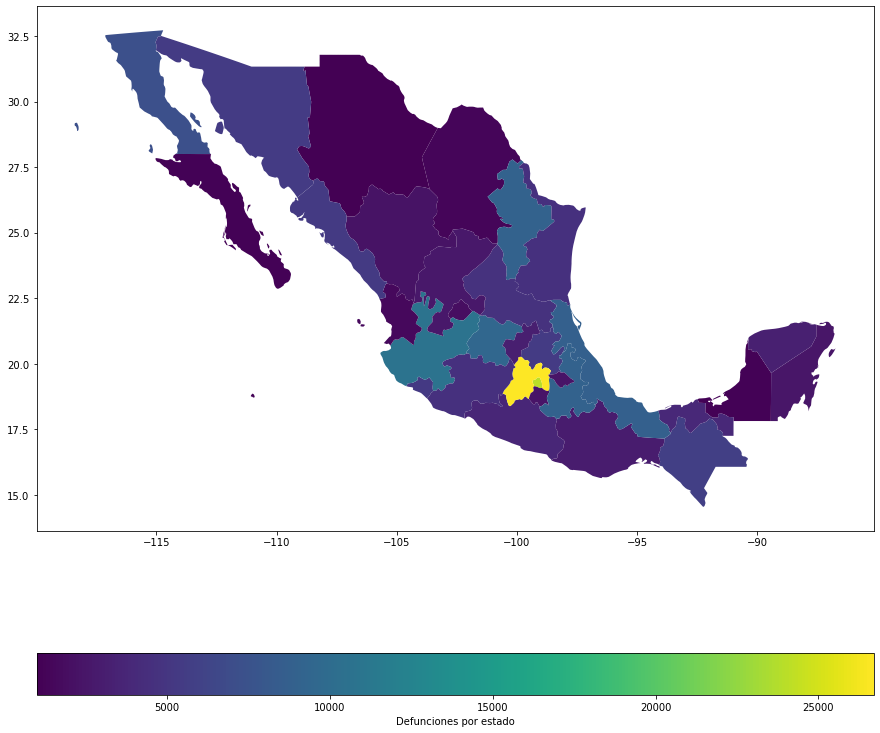

In [19]:
fig, ax = plt.subplots(1, 1, figsize=(15, 15))

mx.plot(column='deaths_cov_19', ax=ax, legend=True,
               legend_kwds={'label': "Defunciones por estado",
                            'orientation': "horizontal"})

plt.savefig(join(output_folder, 'figure5.png'))


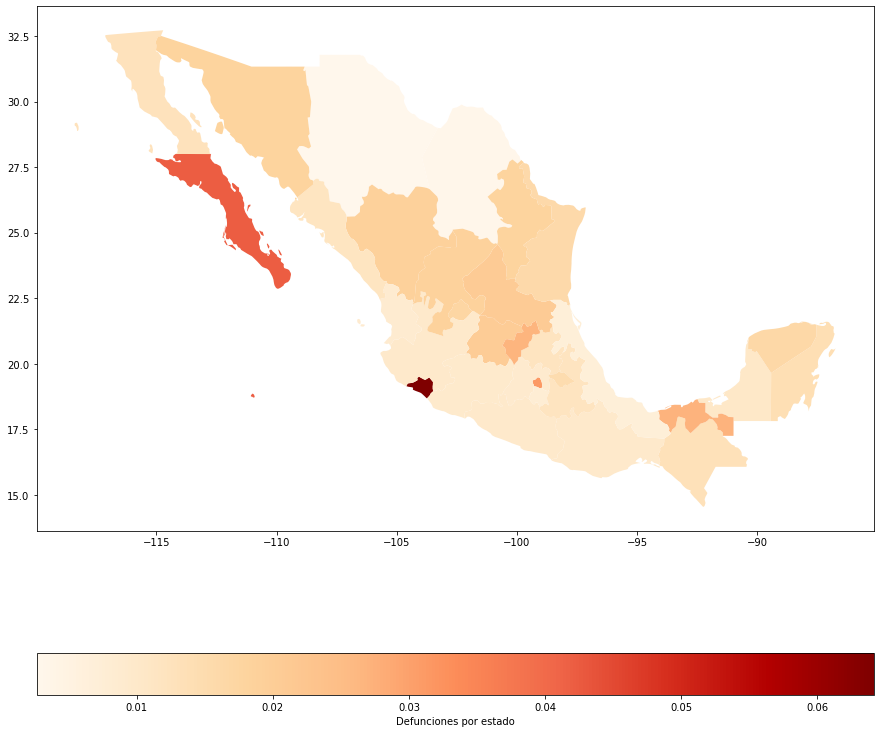

In [20]:
fig, ax = plt.subplots(1, 1, figsize=(15, 15))

normalized_mx.plot(column='positive_cov_19', ax=ax, legend=True,
               legend_kwds={'label': "Defunciones por estado",
                            'orientation': "horizontal"}, cmap='OrRd')

plt.savefig(join(output_folder, 'figure6.png'))


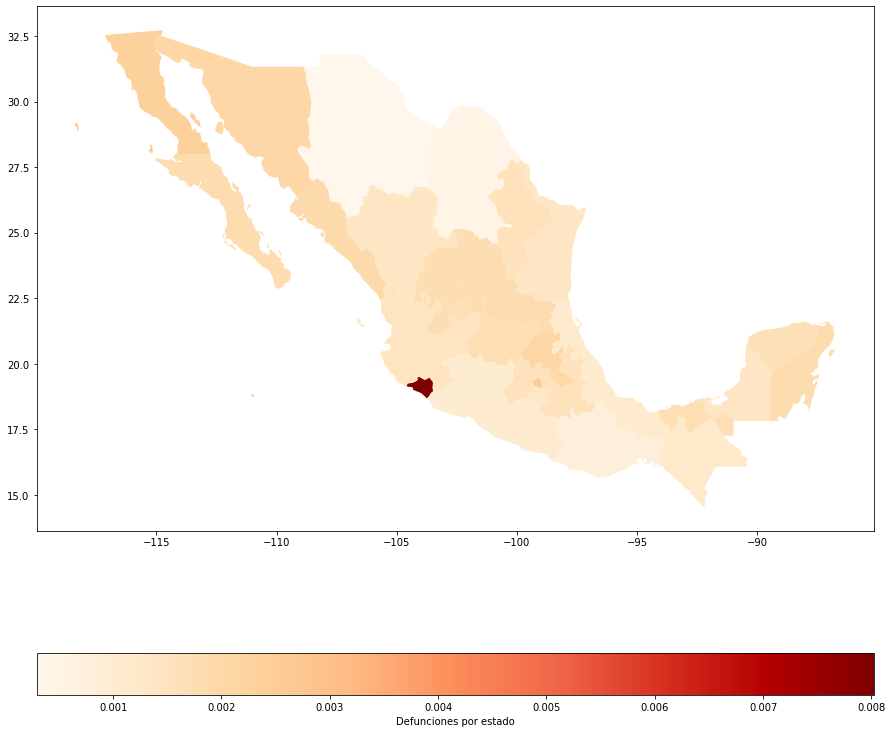

In [21]:
fig, ax = plt.subplots(1, 1, figsize=(15, 15))

normalized_mx.plot(column='deaths_cov_19', ax=ax, legend=True,
               legend_kwds={'label': "Defunciones por estado",
                            'orientation': "horizontal"}, cmap='OrRd')

plt.savefig(join(output_folder, 'figure7.png'))

In [ ]:
# Impacto de covid en el embarazo

In [ ]:
# Hospitalizacion publica vs privada

Diferencia en recuperacion y mortalidad
Tipo de padecimientos por tipo de hospitalizacion
Acceso a servicios de salud

In [ ]:
# Afectacion de poblacion indigena

In [ ]:
# Vacunacion

In [ ]:
# Impacto Acceso a servicios de salud 